In [1]:
In this section,

we'll look at the categorical variables 
the normality of the data


SyntaxError: invalid syntax (<ipython-input-1-0347a2d9e347>, line 1)

In [19]:
#Getting in some generally useful libraries
!pip install --upgrade seaborn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from IPython.display import display
%matplotlib inline


Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages


In [32]:
#Reading Data
hous_df = pd.read_excel('Data/AmesHousing.xls', delimiter=r"\s+")
hous_df['Order'] = hous_df['Order'].astype('object')
hous_df['Year Built'] = hous_df['Year Built'].astype('object')
hous_df['Year Remod/Add'] = hous_df['Year Remod/Add'].astype('object')
hous_df['Bsmt Full Bath'] = hous_df['Bsmt Full Bath'].astype('object')
hous_df['Bsmt Half Bath'] = hous_df['Bsmt Half Bath'].astype('object')
hous_df['Full Bath'] = hous_df['Full Bath'].astype('object')
hous_df['Half Bath'] = hous_df['Half Bath'].astype('object')
hous_df['Bedroom AbvGr'] = hous_df['Bedroom AbvGr'].astype('object')
hous_df['Kitchen AbvGr'] = hous_df['Kitchen AbvGr'].astype('object')
hous_df['TotRms AbvGrd'] = hous_df['TotRms AbvGrd'].astype('object')
hous_df['Fireplaces'] = hous_df['Fireplaces'].astype('object')
hous_df['Garage Yr Blt'] = hous_df['Garage Yr Blt'].astype('object')
hous_df['Garage Cars'] = hous_df['Garage Cars'].astype('object')
hous_df['Mo Sold'] = hous_df['Mo Sold'].astype('object')
hous_df['Yr Sold'] = hous_df['Yr Sold'].astype('object')


In [21]:
numeric_columns = hous_df.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_columns)

['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice']


In [22]:

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,100))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(ax=ax, alpha=0.8)
        plt.axvline(df[var_name].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
        plt.axvline(df[var_name].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
        ax.set_title(var_name+" Distribution")
        plt.legend()
    fig.tight_layout()
    
    plt.show()

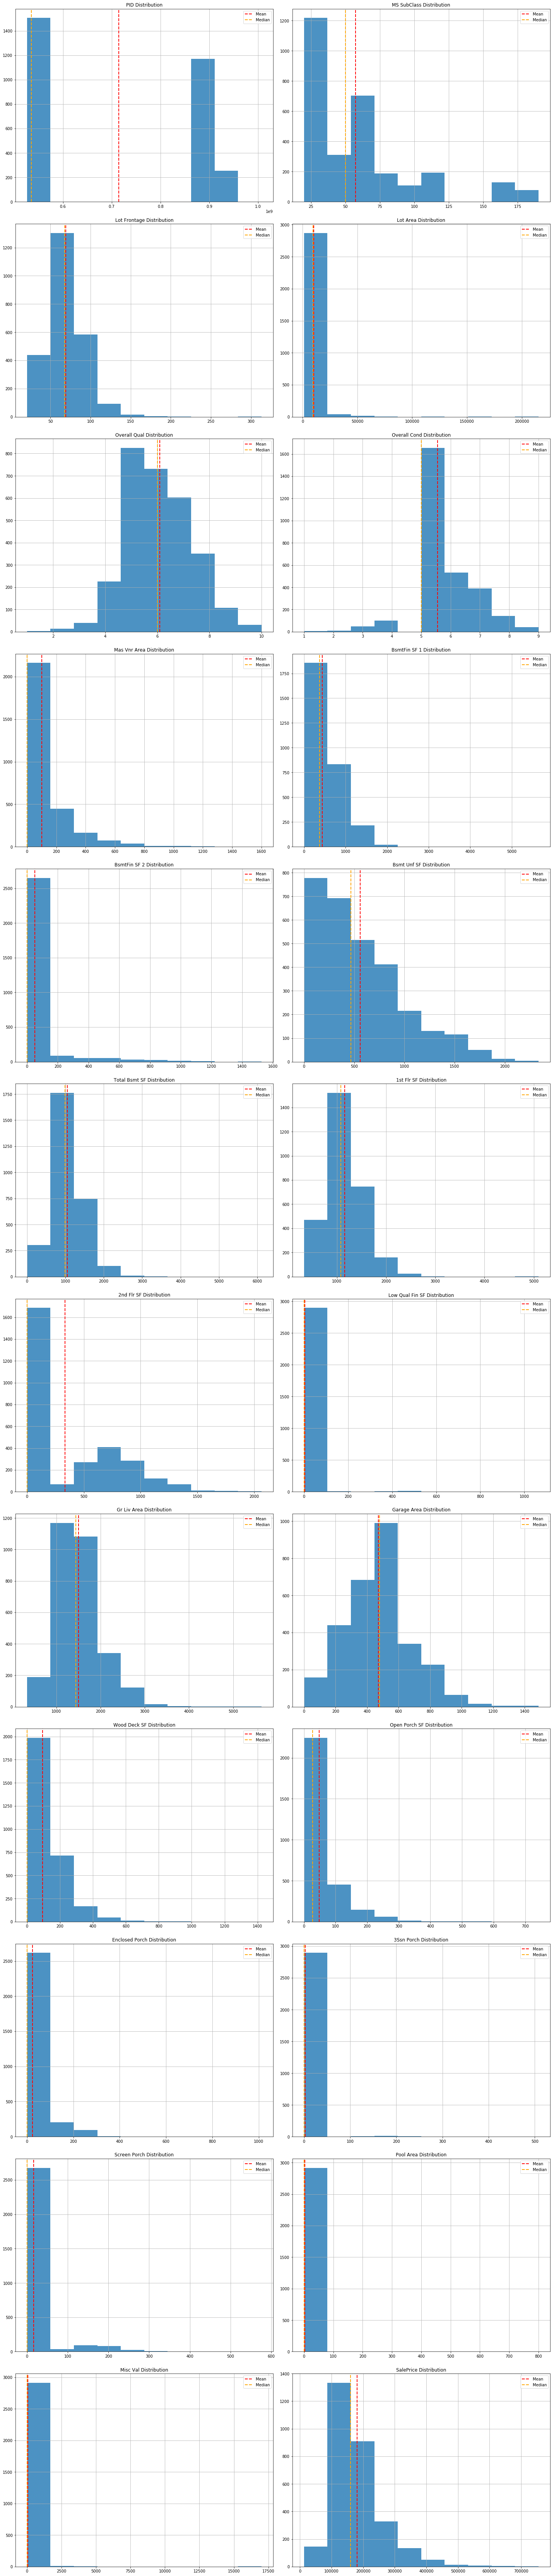

In [23]:
draw_histograms(hous_df, numeric_columns, int(len(numeric_columns)/2)+1, 2)

In [24]:
# Draw scatter plots of numerical columns
def draw_scatters(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15,60))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.regplot(x=var_name,y='SalePrice',data=df,fit_reg=False, scatter_kws={'alpha':0.2})
        ax.set_title(var_name +" vs. Sale Price")
    fig.tight_layout()

    plt.show()

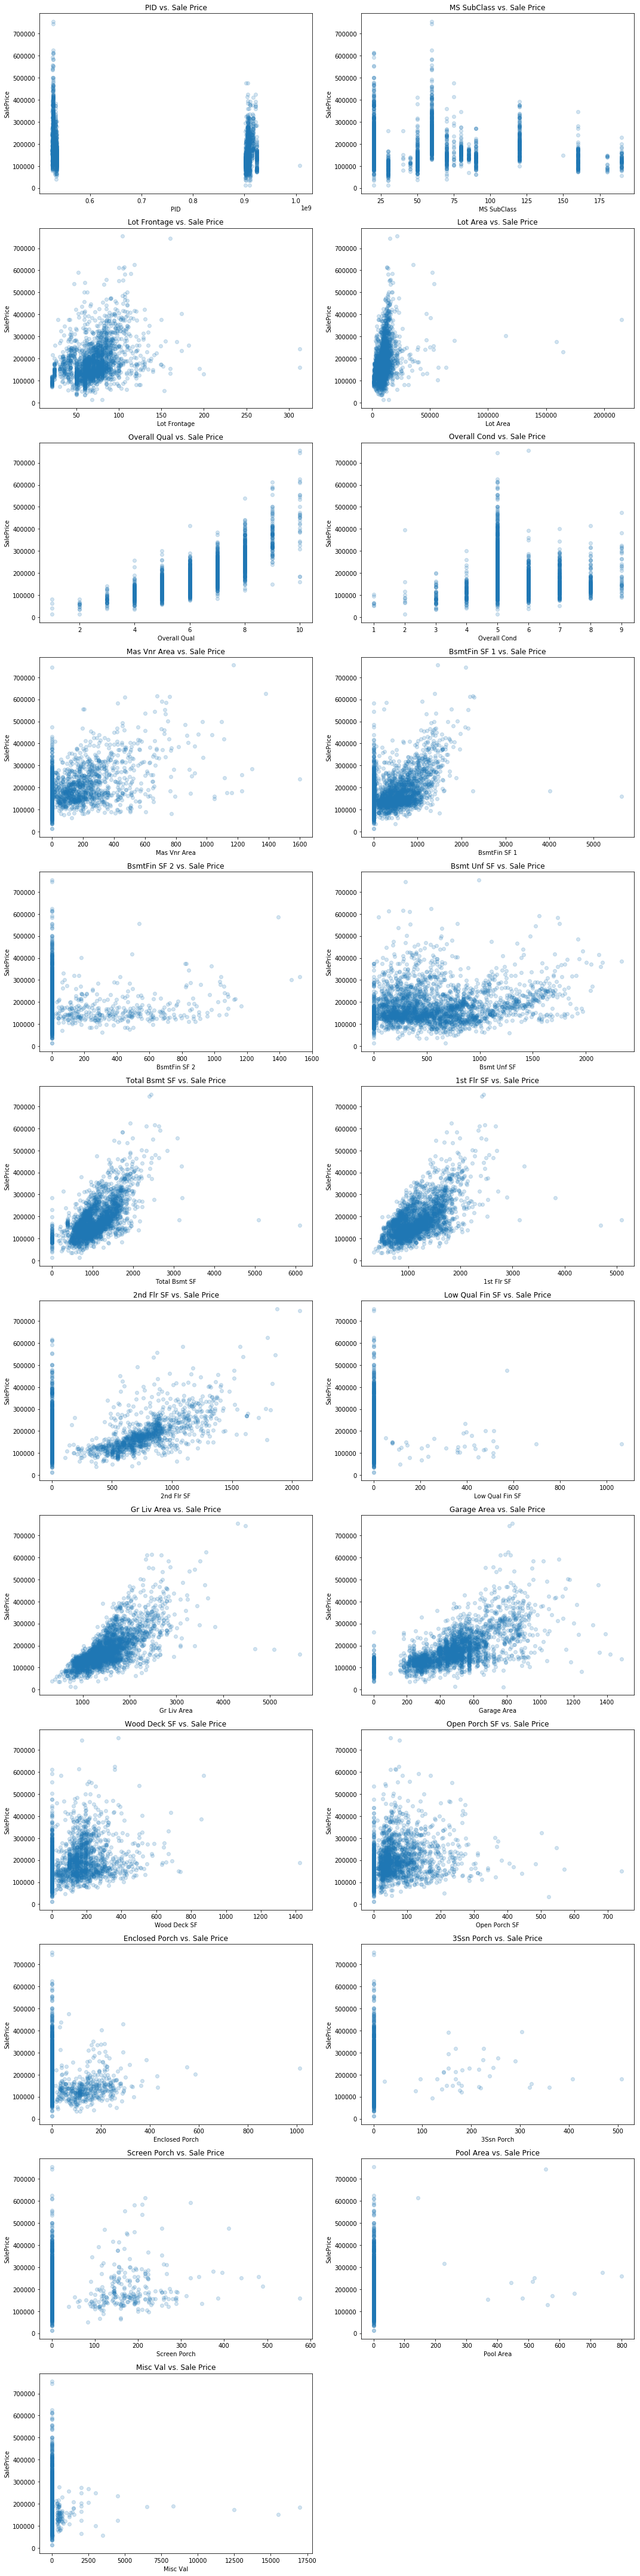

In [25]:
draw_scatters(hous_df, numeric_columns[:-1], int(len(numeric_columns[:-1])/2)+1, 2)

In [33]:
cat_columns = hous_df.select_dtypes(include=[object]).columns.tolist()
cat_columns

['Order',
 'MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Mo Sold',
 'Yr Sold',
 'Sale Type',
 'Sale Condition']

In [14]:
# Draw bar plots of categorical data
def draw_bars(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,160))
    for i, var_name in enumerate(cat_columns):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.barplot(x=var_name,y='SalePrice',data=df,ci='sd')
        if var_name in ['Neighborhood','Exterior 1st','Exterior 2nd']:
            plt.sca(ax)
            plt.xticks(rotation=70)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

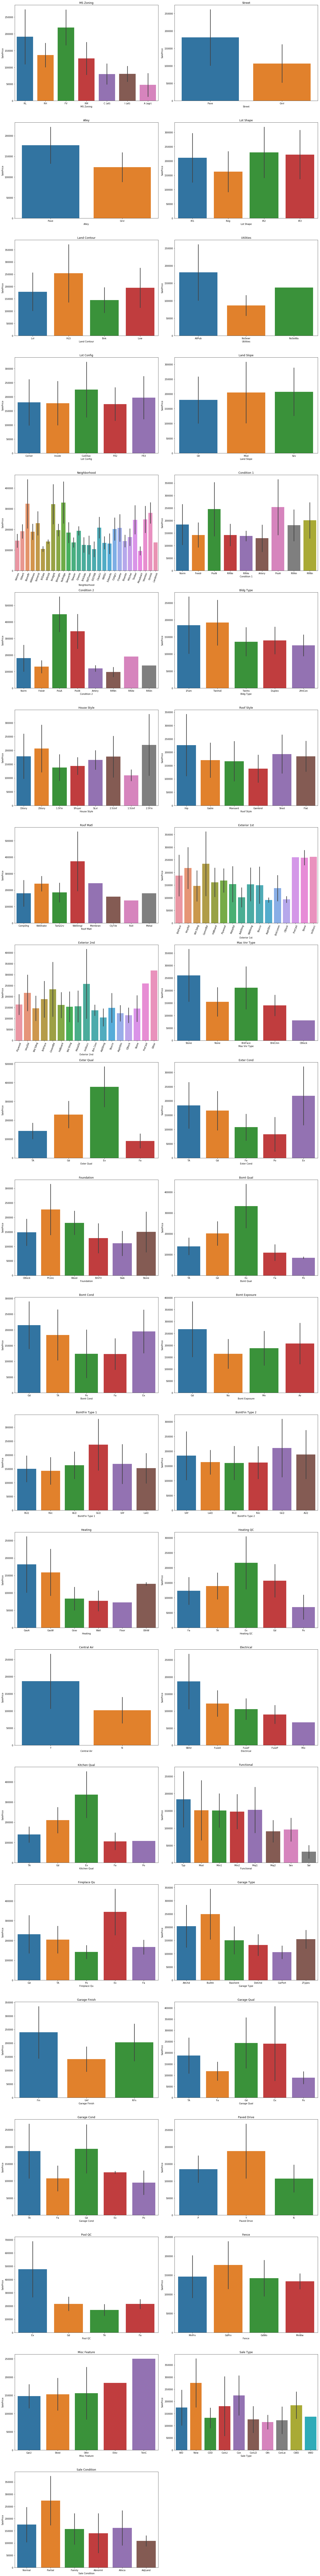

In [18]:
draw_bars(hous_df, cat_columns, int(len(cat_columns)/2)+1, 2)

In [ ]:
# Changing nominal to dummies

# Find all the nominals
PID, MS SubClass, 
MS Zoning, Street, Alley, Land Contour, Lot Config, Neighborhood, Condition 1 ,Condition 2 ,Bldg Type ,House Style
Roof Style ,Roof Matl,Exterior 1 ,Exterior 2 ,Mas Vnr Type, Foundation, 
# Find their classes

# 

series = pandas.Series(
           numpy.random.randint(low=0, high=3, size=100))
mapper = {0: 'New York', 1: 'London', 2: 'Zurich'}
nomvar = series.replace(mapper)

# now let's use pandas.get_dummies
print(
    pandas.get_dummies(series.replace(mpr))

In [ ]:
import pickle
hous_df.to_pickle('../data/housing_df.pkl')
